In [177]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import ReLU, Input, LeakyReLU, Conv2D, Activation, MaxPool2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import Callback
from pathlib import Path
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import cv2
import numpy as np
from glob import glob 
from keras import backend as K
from contextlib import redirect_stdout
from keras.models import Model


PATH = 'G:/Deletar/pictures_conv'
tf.random.set_seed(42) 
PRECISION = tf.float32
HEIGHT = 128
WIDTH = 128
FILTERS = 128
KERNEL_SIZE = 3
STRIDES = 1
BATCH = 1
OUTPUT_CHANNELS = 3
BUFFER_SIZE = 1002


train_bw = glob("G:\\Deletar\\pictures_conv\\train_new\\bw\\*.jpg")
train_color = glob("G:\\Deletar\\pictures_conv\\train_new\\color\\*.jpg")
test_bw = glob("G:\\Deletar\\pictures_conv\\test_new\\bw\\*.jpg")
test_color = glob("G:\\Deletar\\pictures_conv\\test_new\\color\\*.jpg")

In [178]:
# apply black and white colors to image
def apply_bw(filename):
    img = plt.imread(filename)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Input IMG is RGB
    img = cv2.merge([img,img,img])
    return img

def resize_image2(data):
    resized_img = tf.image.resize(
    images=K,
    size=[HEIGHT, WIDTH],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=True,
    )    
    return resized_img

def process_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, PRECISION)
    img = tf.image.resize(img, size=(HEIGHT, WIDTH))
    return img

# read img and transform into tensor image
def read_img(filename):
    img = plt.imread(filename)
    if len(img.shape) == 2:
        img = cv2.merge([img,img,img])
    img = tf.convert_to_tensor(img/255., dtype=PRECISION)
    return img

def get_all_info(folder):
    imgs = []
    for file in os.listdir(folder):
        img_tensor = read_img(folder + "\\" + file) 
    return imgs

""" z = get_all_info("G:\\Deletar\\pictures_conv\\train_new\\bw") """

files_ds = tf.data.Dataset.from_tensor_slices((train_bw, train_color))
files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH).shuffle(BUFFER_SIZE)
val_files = tf.data.Dataset.from_tensor_slices((test_bw, test_color))
val_files = val_files.map(lambda x, y: (process_img(x), process_img(y))).batch(BATCH)

example = list(files_ds.as_numpy_iterator())

In [179]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(Conv2D(filters, size, padding='same', strides=2, name='conv2d_01', kernel_initializer=initializer, use_bias=False),)                           
    """ result.add(      
     Conv2D(tf.keras.layers.Conv2D(filters, kernel_size = size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))) """
    if apply_batchnorm:
      result.add(BatchNormalization())
    result.add(LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = Sequential()
  result.add(
    Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(BatchNormalization())
  if apply_dropout:
      result.add(Dropout(0.5))
  result.add(ReLU())
  return result


class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, x_test):
        self.model = model

    def on_epoch_end(self, epoch, logs={}):
      if epoch % 5 == 0: 
        z = self.model.predict(example[0][0])
        plt.imshow(z[0])
        plt.show()
        

Epoch 1/200
1002/1002 [==============================] - 17s 16ms/step - loss: 0.6947 - accuracy: 0.3552 - val_loss: 0.5475 - val_accuracy: 0.3648


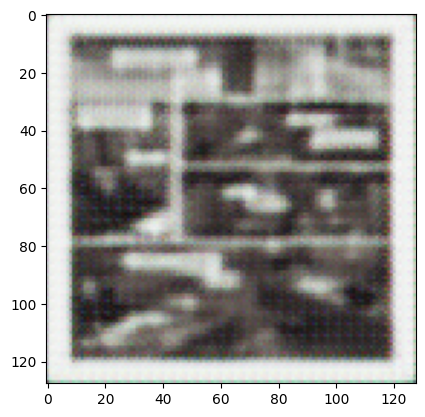

Epoch 2/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5689 - accuracy: 0.3790 - val_loss: 0.5295 - val_accuracy: 0.4163
Epoch 3/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5527 - accuracy: 0.3981 - val_loss: 0.5333 - val_accuracy: 0.3956
Epoch 4/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5448 - accuracy: 0.4134 - val_loss: 0.5236 - val_accuracy: 0.4375
Epoch 5/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5393 - accuracy: 0.4272 - val_loss: 0.5166 - val_accuracy: 0.4070
Epoch 6/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5348 - accuracy: 0.4394 - val_loss: 0.5155 - val_accuracy: 0.3681


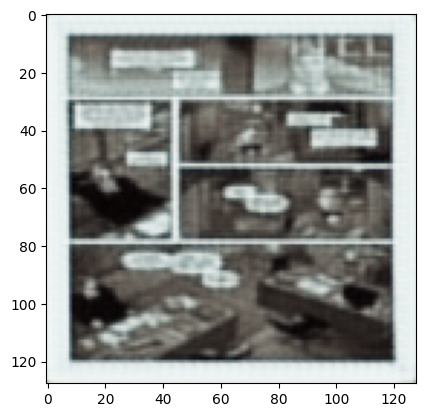

Epoch 7/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5302 - accuracy: 0.4438 - val_loss: 0.5170 - val_accuracy: 0.4580
Epoch 8/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5302 - accuracy: 0.4475 - val_loss: 0.5158 - val_accuracy: 0.4544
Epoch 9/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5248 - accuracy: 0.4506 - val_loss: 0.5132 - val_accuracy: 0.4098
Epoch 10/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5258 - accuracy: 0.4550 - val_loss: 0.5182 - val_accuracy: 0.4438
Epoch 11/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5213 - accuracy: 0.4530 - val_loss: 0.5142 - val_accuracy: 0.4662


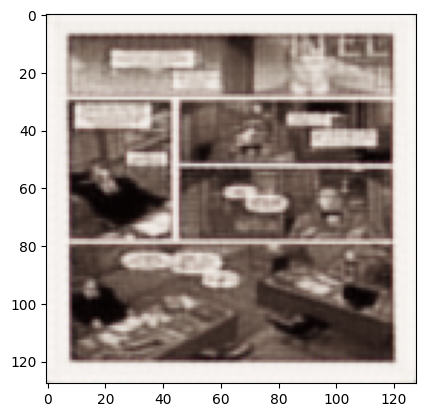

Epoch 12/200
1002/1002 [==============================] - 15s 15ms/step - loss: 0.5194 - accuracy: 0.4527 - val_loss: 0.5134 - val_accuracy: 0.4662
Epoch 13/200
1002/1002 [==============================] - 15s 15ms/step - loss: 0.5184 - accuracy: 0.4517 - val_loss: 0.5114 - val_accuracy: 0.4254
Epoch 14/200
1002/1002 [==============================] - 15s 15ms/step - loss: 0.5172 - accuracy: 0.4527 - val_loss: 0.5116 - val_accuracy: 0.4653
Epoch 15/200
1002/1002 [==============================] - 15s 15ms/step - loss: 0.5170 - accuracy: 0.4520 - val_loss: 0.5126 - val_accuracy: 0.4624
Epoch 16/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5157 - accuracy: 0.4505 - val_loss: 0.5129 - val_accuracy: 0.4525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


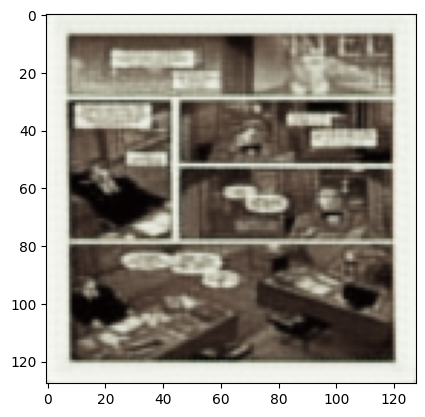

Epoch 17/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5153 - accuracy: 0.4522 - val_loss: 0.5120 - val_accuracy: 0.4619
Epoch 18/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5146 - accuracy: 0.4515 - val_loss: 0.5135 - val_accuracy: 0.4476
Epoch 19/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5148 - accuracy: 0.4526 - val_loss: 0.5128 - val_accuracy: 0.4540
Epoch 20/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5139 - accuracy: 0.4536 - val_loss: 0.5153 - val_accuracy: 0.4278
Epoch 21/200
1002/1002 [==============================] - 16s 16ms/step - loss: 0.5139 - accuracy: 0.4539 - val_loss: 0.5173 - val_accuracy: 0.4254


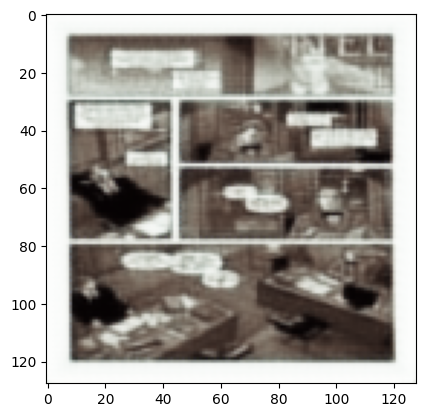

Epoch 22/200
1002/1002 [==============================] - 16s 15ms/step - loss: 0.5138 - accuracy: 0.4513 - val_loss: 0.5093 - val_accuracy: 0.4033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AxesImage(size=(128, 128))


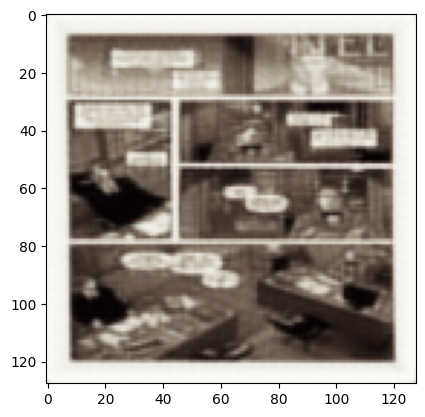

In [180]:

initializer = tf.random_normal_initializer(0., 0.02)


model = Sequential()
model.add(Input(shape=(128, 128, 3,)))

#Encoder
""" model.add(downsample(64,4, apply_batchnorm=False))
model.add(downsample(128,4)) """


model.add(downsample(1024,4, apply_batchnorm=False)) #best
model.add(downsample(64,4))



#Decoder

""" model.add(upsample(128,4, apply_dropout=True))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh'))  """

model.add(upsample(64,4, apply_dropout=True))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) 






model.compile(
    #""" loss=tf.keras.losses.BinaryCrossentropy(), """
    # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    metrics=["accuracy"]
    
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)



model.fit(files_ds,epochs=200, callbacks=[CustomCallback(model, files_ds), callback], validation_data=val_files)




z = model.predict(example[0][0])

print(plt.imshow(z[0]))



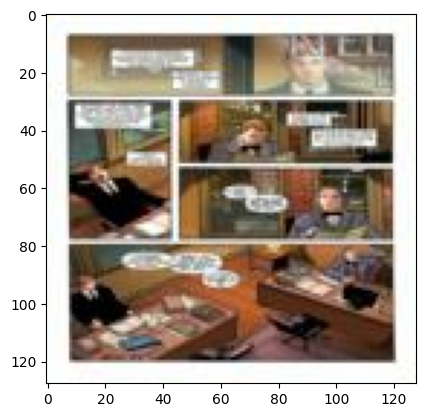

In [181]:
plt.imshow(example[0][1][0])

In [182]:
#comments

""" model = Sequential([
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_01'),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_01'),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_02'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_02'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_03'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPool2D((2, 2),  padding='same', name='max_pool_04'),
    Conv2D(FILTERS/4, (3, 3),  padding='same', name='conv2d_04'),
    Dropout(0.5),
    Activation('relu', name='relu_04'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS/2, (3, 3),  padding='same', name='conv2d_05'),
    Dropout(0.5),
    Activation('relu', name='relu_05'),
    UpSampling2D((2, 2)),
    Conv2D(FILTERS, (3, 3),  padding='same', name='conv2d_06'),
    Activation('relu', name='relu_06'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=1,
                                         padding='same'),
    Activation('tanh'),    
]) """

# model.add(Input(shape=[HEIGHT, WIDTH, 3]))

""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(upsample(128,4, apply_dropout=True)) """

""" model = Sequential()
model.add(downsample(64,9, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(upsample(128,4, apply_dropout=True))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """

""" model.add(downsample(128,4)) """
""" model.add(downsample(256,4)) """
""" model.add(downsample(128,4, apply_batchnorm=False))
model.add(downsample(128,4))
model.add(downsample(128,4)) """
""" model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))) """

""" model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer))
model.add(Activation('tanh')) """


""" model.add(upsample(128,4, apply_dropout=True))
model.add(upsample(128,4, apply_dropout=True)) """
""" model.add(upsample(128,4))
model.add(upsample(128,4)) """
""" model.add(upsample(256,4, apply_dropout=True)) """
""" model.add(upsample(128,4)) """


""" 
model.add(UpSampling2D((2, 2))) """

""" encoder_output = (encoder_input)



decoder_output = (encoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output)
decoder_output = (decoder_output) """


' encoder_output = (encoder_input)\n\n\n\ndecoder_output = (encoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output)\ndecoder_output = (decoder_output) '